In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from hmmlearn import hmm
import scipy.signal


In [4]:
timepoint = 0
Uvel,Vvel,Wvel = [],[],[]

file = open("velocity_signal.txt", "r" )
for line in file:
   timepoint = timepoint+1     
   linevel = line.strip()
   linevel = line.split()
   Uvel.append(float(linevel[0]))
   Vvel.append(float(linevel[1]))
   Wvel.append(float(linevel[2]))
file.close()
print("The data set contains %s timepoint"%(str(timepoint)))

X = np.zeros((len(Uvel),3))

for i in range(len(Uvel)):
    X[i][0] = Uvel[i]
    X[i][1] = Vvel[i]
    X[i][2] = Wvel[i]
    
        

The data set contains 157400 timepoint


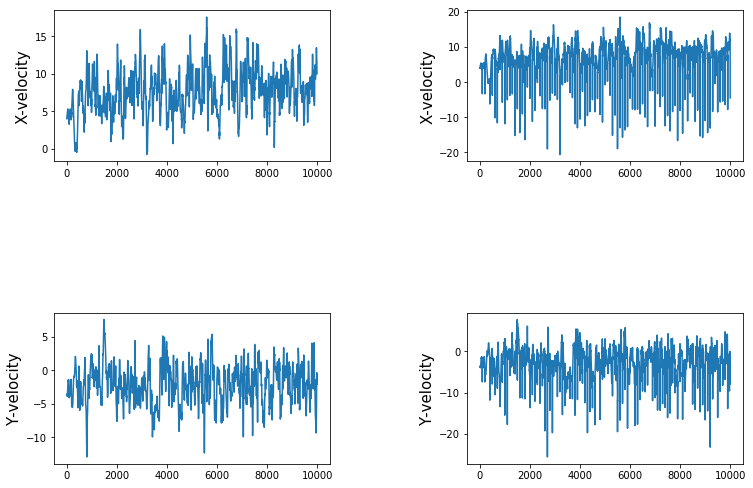

In [5]:
length = 10000
Xavg_5 = np.zeros((len(Uvel),3))
Xavg_10 = np.zeros((len(Uvel),3))
for i in range(len(Uvel)-4):
    Xavg_5[i][0] = (Uvel[i] + Uvel[i+1] + Uvel[i+2] + Uvel[i+3] + Uvel[i+4])/5
    Xavg_5[i][1] = (Vvel[i] + Vvel[i+1] + Vvel[i+2] + Vvel[i+3] + Vvel[i+4])/5
    Xavg_5[i][2] = (Wvel[i] + Wvel[i+1] + Wvel[i+2] + Wvel[i+3] + Wvel[i+4])/5

for i in range(len(Uvel)-9):
    Xavg_10[i][0] = (Uvel[i] + Uvel[i+1] + Uvel[i+2] + Uvel[i+3] + Uvel[i+4]+ Uvel[i+5] + Uvel[i+6] + Uvel[i+7] + Uvel[i+8] + Uvel[i+9])/10
    Xavg_10[i][1] = (Vvel[i] + Vvel[i+1] + Vvel[i+2] + Vvel[i+3] + Vvel[i+4]+ Vvel[i+5] + Vvel[i+6] + Vvel[i+7] + Vvel[i+8] + Vvel[i+9])/10
    Xavg_10[i][2] = (Wvel[i] + Wvel[i+1] + Wvel[i+2] + Wvel[i+3] + Wvel[i+4]+ Wvel[i+5] + Wvel[i+6] + Wvel[i+7] + Wvel[i+8] + Wvel[i+9])/10


f, axes = plt.subplots(2,2)

                                                                                                                                                                                          
f.set_size_inches(25.5, 10.5,forward=True)                                                                                                                                                                 
f.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.7, wspace=0.5, hspace=1)
#axes[0, 0].plot(np.linspace(1,length,length),X[0:length,0])
axes[0, 0].plot(np.linspace(1,length,length),Xavg_10[0:length,0])
axes[0, 0].set_ylabel('X-velocity')
axes[0, 0].yaxis.label.set_size(15)

#axes[0, 1].plot(np.linspace(1,length,length),X[0:length,0])
axes[0, 1].plot(np.linspace(1,length,length),X[0:length,0])
axes[0, 1].set_ylabel('X-velocity')
axes[0, 1].yaxis.label.set_size(15)

#axes[1, 0].plot(np.linspace(1,length,length),X[0:length,1])
axes[1, 0].plot(np.linspace(1,length,length),Xavg_10[0:length,1])
axes[1, 0].set_ylabel('Y-velocity')
axes[1, 0].yaxis.label.set_size(15)

#axes[1, 1].plot(np.linspace(1,length,length),X[0:length,1])
axes[1, 1].plot(np.linspace(1,length,length),X[0:length,1])
axes[1, 1].set_ylabel('Y-velocity')
axes[1, 1].yaxis.label.set_size(15)



plt.show()

In [3]:
actual_len = 1000
train_len = 100
test_len = 10
diff_prediction =  np.zeros((1,2))
Y_vec =  np.zeros((test_len,2))
for k in range(test_len):
    model = hmm.GaussianHMM(n_components=2,covariance_type="full", n_iter=1000).fit(X[actual_len+k:actual_len+train_len+k,0:2])
    model.startprob_ = model.startprob_ 
    model.transmat_ = model.transmat_
    model.means_    = model.means_
    model.covars_ =  model.covars_ 
  
    for j in range(actual_len):
        model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000,init_params="mcs").fit(X[actual_len+k-j:actual_len+train_len+k-j,0:2],[])
        backlogprob = model.score(X[actual_len-j:actual_len+train_len-j,0:2])
        if abs(backlogprob-logprob) <= 0.00001 :
            diff_prediction = X[actual_len+train_len+k-j+1,0:2]-X[actual_len+train_len+k-j,0:2]
            j = actual_len
    Y_vec[k,:] = diff_prediction + X[actual_len+k:actual_len+train_len+k,0:2]


C:\Python27\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_nor

ValueError: rows of transmat_ must sum to 1.0 (got [1. 0.])

In [6]:
print(Y_vec.shape)
f, axes = plt.subplots(2,2)
                                                                                                                                                                                          
f.set_size_inches(25.5, 10.5,forward=True)                                                                                                                                                                 
f.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.7, wspace=1, hspace=0.5)
axes[0, 0].plot(np.linspace(1,test_len,test_len),X[actual_len+train_len:actual_len+train_len+test_len,0])
axes[0, 0].plot(np.linspace(1,test_len,test_len),Y_vec[:,0],'r--')

axes[0, 0].set_ylabel('X-velocity')
axes[0, 0].yaxis.label.set_size(15)


axes[1, 0].plot(np.linspace(1,test_len,test_len),X[actual_len+train_len:actual_len+train_len+test_len,1])
axes[1, 0].plot(np.linspace(1,test_len,test_len),Y_vec[:,1],'r--')
axes[1, 0].set_ylabel('Y-velocity')
axes[1, 0].yaxis.label.set_size(15)


plt.show()

NameError: name 'Y_vec' is not defined